# Detecção de Fraude em Cartão de Crédito com Redes Neurais
## Objetivo do projeto
Desenvolver um classificador de transações fraudulentas utilizando Redes Neurais, avaliando o impacto da arquitetura, funções de perda, otimizadores e regularizações através de um estudo de ablação.

- Base de dados: creditcard.csv (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
O conjunto de dados contém transações feitas com cartões de crédito em setembro de 2013 por titulares de cartões europeus.
Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 transações.
- Desafio: alta desproporção entre casos legítimos e fraudulentos.
- Metodologia: criar e testar diferentes variações de redes MLP, utilizando métricas adequadas para classificação desbalanceada.

# Carregamento e preparação dos dados
- Carregar o conjunto de dados creditcard.csv.
- Explorar as principais features presentes no dataset.
- Realizar o pré-processamento necessário, incluindo normalização das variáveis Time e Amount.
- Separar os dados em conjuntos de treino e teste, considerando a desproporção entre classes.

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura do dataset
df = pd.read_csv('creditcard.csv')

# Visualização inicial
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Análise Exploratória dos Dados

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


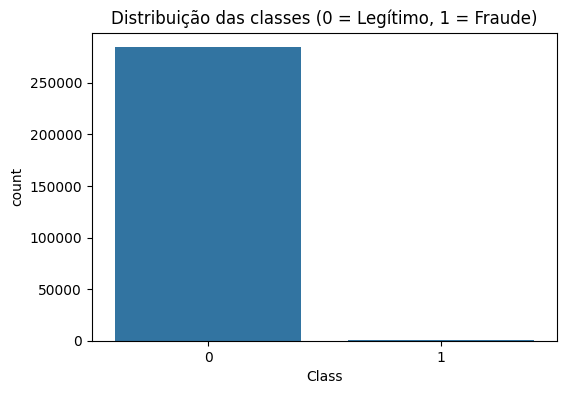

Porcentagem de transações fraudulentas: 0.172749%
O gráfico gerado mostra visualmente a grande diferença entre o número de transações legítimas (Class = 0) e transações fraudulentas (Class = 1) presentes no conjunto de dados.
A maior parte das transações é legítima, enquanto as fraudes representam menos de 0,2% do total.


In [6]:
# Verificando o formato e as colunas do dataset
print(df.shape)
print(df.columns)

# Verificando valores ausentes
print(df.isnull().sum())

# Distribuição das classes (legítimas x fraudes)
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Distribuição das classes (0 = Legítimo, 1 = Fraude)')
plt.show()

# Proporção de fraudes no dataset
fraude_pct = df['Class'].mean() * 100
print(f'Porcentagem de transações fraudulentas: {fraude_pct:.6f}%')
print(f'O gráfico gerado mostra visualmente a grande diferença entre o número de transações legítimas (Class = 0) e transações fraudulentas (Class = 1) presentes no conjunto de dados.')
print(f'A maior parte das transações é legítima, enquanto as fraudes representam menos de 0,2% do total.')


# Pré-processamento: normalização das variáveis

In [7]:
from sklearn.preprocessing import StandardScaler

# Normalização das colunas 'Amount' e 'Time'
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['normTime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

# Removendo 'Amount' e 'Time' originais
df = df.drop(['Amount', 'Time'], axis=1)

# Visualização das primeiras linhas após normalização
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normAmount,normTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


# Separação dos dados em treino e teste

- Treino: utilizado para ajustar os pesos da rede neural.

- Teste: utilizado apenas para avaliar a capacidade de generalização do modelo, simulando dados nunca vistos.

In [12]:
from sklearn.model_selection import train_test_split

# Separando features (X) e rótulo (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Separação com estratificação, 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Conferindo as proporções após split
print('Proporção de fraudes no treino: {:.6f}%'.format(y_train.mean() * 100))
print('Proporção de fraudes no teste:  {:.6f}%'.format(y_test.mean() * 100))
print(f'Como há grande desbalanceamento entre as classes, usamos a opção de estratificação')
print(f'garantindo que a proporção de fraudes e não-fraudes seja mantida nas duas amostras.')

Proporção de fraudes no treino: 0.172925%
Proporção de fraudes no teste:  0.172045%
Como há grande desbalanceamento entre as classes, usamos a opção de estratificação
garantindo que a proporção de fraudes e não-fraudes seja mantida nas duas amostras.


# Rede Neural MLP (Perceptron Multicamadas) simples
- camadas densas (fully-connected) e ativação relu, finalizando com ativação sigmoid para realizar a classificação binária.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Modelo MLP com Input shape explícito na primeira camada
model = Sequential([
    Input(shape=(X_train.shape[1],)),     # usa camada Input
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=2048,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10
90/90 - 1s - 12ms/step - accuracy: 0.8666 - loss: 0.3556 - val_accuracy: 0.9982 - val_loss: 0.0837
Epoch 2/10
90/90 - 0s - 2ms/step - accuracy: 0.9983 - loss: 0.0415 - val_accuracy: 0.9981 - val_loss: 0.0188
Epoch 3/10
90/90 - 0s - 3ms/step - accuracy: 0.9986 - loss: 0.0140 - val_accuracy: 0.9989 - val_loss: 0.0094
Epoch 4/10
90/90 - 0s - 3ms/step - accuracy: 0.9990 - loss: 0.0081 - val_accuracy: 0.9993 - val_loss: 0.0064
Epoch 5/10
90/90 - 0s - 2ms/step - accuracy: 0.9992 - loss: 0.0059 - val_accuracy: 0.9994 - val_loss: 0.0052
Epoch 6/10
90/90 - 0s - 2ms/step - accuracy: 0.9993 - loss: 0.0049 - val_accuracy: 0.9994 - val_loss: 0.0046
Epoch 7/10
90/90 - 0s - 3ms/step - accuracy: 0.9994 - loss: 0.0043 - val_accuracy: 0.9994 - val_loss: 0.0042
Epoch 8/10
90/90 - 0s - 2ms/step - accuracy: 0.9994 - loss: 0.0040 - val_accuracy: 0.9994 - val_loss: 0.0040
Epoch 9/10
90/90 - 0s - 2ms/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 10/10
90/90 

O otimizador utilizado é o Adam
Esse modelo servirá como referência para a etapa de ablação, para serem testadas e comparadas diferentes variações de arquitetura, funções de perda e regularização.

# Avaliação do Modelo Inicial

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step

Resultados do modelo inicial:

- Accuracy: 0.999298
  * Proporção de previsões corretas (inclui legítimos e fraudes).
- Precision: 0.822222
  * Proporção de transações previstas como fraude que eram realmente fraude.
- Recall: 0.755102
  * Proporção de fraudes detectadas dentre todas as fraudes reais (sensibilidade).
- F1 Score: 0.787234
  * Média harmônica entre precisão e recall; equilíbrio entre falso positivo e falso negativo.
- ROC AUC: 0.964097
  * Métrica global de separação das classes (quanto mais próximo de 1, melhor).




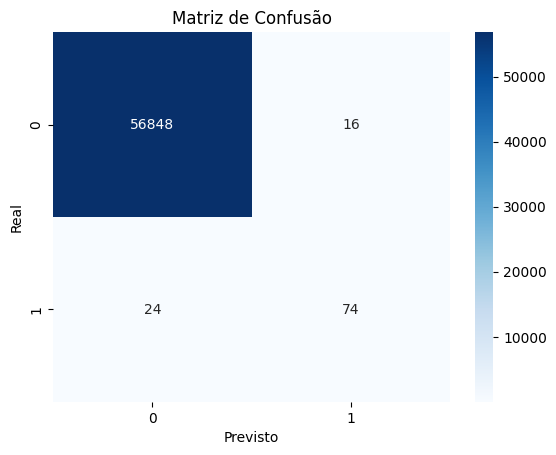

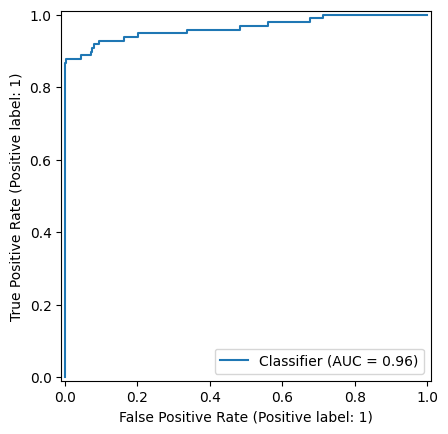

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay

# Previsões do modelo
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Métricas principais
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"""
Resultados do modelo inicial:

- Accuracy: {acc:.6f}
  * Proporção de previsões corretas (inclui legítimos e fraudes).
- Precision: {prec:.6f}
  * Proporção de transações previstas como fraude que eram realmente fraude.
- Recall: {recall:.6f}
  * Proporção de fraudes detectadas dentre todas as fraudes reais (sensibilidade).
- F1 Score: {f1:.6f}
  * Média harmônica entre precisão e recall; equilíbrio entre falso positivo e falso negativo.
- ROC AUC: {auc:.6f}
  * Métrica global de separação das classes (quanto mais próximo de 1, melhor).

""")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_pred_prob)
plt.show()


In [ ]:
- O modelo inicial já está conseguindo detectar fraudes, mas o desbalanceamento limita o recall.

# Estudo de Ablação: Variações de Arquitetura, Funções de Perda e Otimizadores
## diferentes configurações de rede neural para investigar o impacto de cada elemento (camadas, número de neurônios, regularização, funções de perda, otimizadores) no desempenho do modelo.
- Variação do número de camadas e neurônios
- Adição de Dropout e BatchNormalization
- Troca do otimizador (Adam, RMSprop, SGD)
- Alteração da taxa de aprendizado
- Uso de diferentes funções de perda (binary_crossentropy, focal_loss/opcional)
- Uso de Regularization L2


In [21]:
# Variação do número de camadas e neurônios

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

resultados_modelos = []

configuracoes = [
    {'camadas':[16],             'descricao': '1 camada oculta (16)'},
    {'camadas':[32, 16],         'descricao': '2 camadas ocultas (32,16)'},
    {'camadas':[64, 32, 16],     'descricao': '3 camadas ocultas (64,32,16)'},
    {'camadas':[128, 64, 32, 16],'descricao': '4 camadas ocultas (128,64,32,16)'}
]

for config in configuracoes:
    # Monta o modelo conforme config
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for n in config['camadas']:
        model.add(Dense(n, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=2048, validation_split=0.2, verbose=0)
    
    # Previsão e métricas
    y_pred_prob = model.predict(X_test).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    resultados_modelos.append({
        'Descrição': config['descricao'],
        'Accuracy': acc, 'Precision': prec, 'Recall': recall, 'F1': f1, 'AUC': auc
    })

# Exibir como tabela
import pandas as pd
resultados_df = pd.DataFrame(resultados_modelos)
print(resultados_df)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step
                          Descrição  Accuracy  Precision    Recall        F1  \
0              1 camada oculta (16)  0.999245   0.839506  0.693878  0.759777   
1         2 camadas ocultas (32,16)  0.999368   0.852273  0.765306  0.806452   
2      3 camadas ocultas (64,32,16)  0.999333   0.800000  0.816327  0.808081   
3  4 camadas ocultas (128,64,32,16)  0.999315   0.780952  0.836735  0.807882   

        AUC  
0  0.938002  
1  0.975085  
2  0.976045  
3  0.977746  


In [22]:
for resultado in resultados_modelos:
    print(f"{30*'='}\n{resultado['Descrição']}")
    print(f"- Accuracy: {resultado['Accuracy']:.6f}  |  Mede o acerto geral (nem sempre relevante aqui).")
    print(f"- Precision: {resultado['Precision']:.6f}  |  Porcentagem de alertas de fraude realmente corretos.")
    print(f"- Recall: {resultado['Recall']:.6f}     |  Capacidade de encontrar todas as fraudes (sensibilidade).")
    print(f"- F1: {resultado['F1']:.6f}         |  Equilíbrio entre Precision e Recall.")
    print(f"- ROC AUC: {resultado['AUC']:.6f}   |  Separação global das classes (quanto mais perto de 1, melhor).\n")

1 camada oculta (16)
- Accuracy: 0.999245  |  Mede o acerto geral (nem sempre relevante aqui).
- Precision: 0.839506  |  Porcentagem de alertas de fraude realmente corretos.
- Recall: 0.693878     |  Capacidade de encontrar todas as fraudes (sensibilidade).
- F1: 0.759777         |  Equilíbrio entre Precision e Recall.
- ROC AUC: 0.938002   |  Separação global das classes (quanto mais perto de 1, melhor).

2 camadas ocultas (32,16)
- Accuracy: 0.999368  |  Mede o acerto geral (nem sempre relevante aqui).
- Precision: 0.852273  |  Porcentagem de alertas de fraude realmente corretos.
- Recall: 0.765306     |  Capacidade de encontrar todas as fraudes (sensibilidade).
- F1: 0.806452         |  Equilíbrio entre Precision e Recall.
- ROC AUC: 0.975085   |  Separação global das classes (quanto mais perto de 1, melhor).

3 camadas ocultas (64,32,16)
- Accuracy: 0.999333  |  Mede o acerto geral (nem sempre relevante aqui).
- Precision: 0.800000  |  Porcentagem de alertas de fraude realmente cor

In [23]:
# Adição de Dropout e BatchNormalization

from tensorflow.keras.layers import Dropout, BatchNormalization

modelos_reg = [
    {'desc': 'Sem Dropout/BatchNorm', 'layers': []},
    {'desc': 'Com Dropout 0.5', 'layers': [Dropout(0.5)]},
    {'desc': 'Com BatchNorm', 'layers': [BatchNormalization()]},
    {'desc': 'Dropout 0.5 + BatchNorm', 'layers': [Dropout(0.5), BatchNormalization()]},
]

resultados_reg = []
for config in modelos_reg:
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    for layer in config['layers']:
        model.add(layer)
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=2048, validation_split=0.2, verbose=0)
    
    y_pred_prob = model.predict(X_test).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    resultados_reg.append({'Descrição': config['desc'], 'Accuracy': acc, 'Precision': prec, 'Recall': recall, 'F1': f1, 'AUC': auc})

for resultado in resultados_reg:
    print(f"{30*'='}\n{resultado['Descrição']}")
    print(f"- Accuracy: {resultado['Accuracy']:.6f}")
    print(f"- Precision: {resultado['Precision']:.6f}")
    print(f"- Recall: {resultado['Recall']:.6f}")
    print(f"- F1: {resultado['F1']:.6f}")
    print(f"- ROC AUC: {resultado['AUC']:.6f}\n")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step
Sem Dropout/BatchNorm
- Accuracy: 0.999315
- Precision: 0.831461
- Recall: 0.755102
- F1: 0.791444
- ROC AUC: 0.980579

Com Dropout 0.5
- Accuracy: 0.998280
- Precision: 0.000000
- Recall: 0.000000
- F1: 0.000000
- ROC AUC: 0.970603

Com BatchNorm
- Accuracy: 0.999263
- Precision: 0.841463
- Recall: 0.704082
- F1: 0.766667
- ROC AUC: 0.963748

Dropout 0.5 + BatchNorm
- Accuracy: 0.999280
- Precision: 0.813187
- Recall: 0.755102
- F1: 0.783069
- ROC AUC: 0.960581



In [27]:
print("""
Resultados do impacto de Dropout e BatchNormalization:

- Sem Dropout/BatchNorm: 
  * Resultados equilibrados, boa precisão (0.83) e recall (0.75).  
  * Modelo base já apresenta bom desempenho e AUC alto (0.98).

- Com Dropout 0.5:
  * O modelo não detectou nenhuma fraude (recall 0.00 e F1 0.00) — o que pode indicar excesso de regularização, deixando a rede subajustada para a classe minoritária.

- Com BatchNormalization:
  * Precision e recall tiveram leve melhora, principalmente o recall (0.70 para 0.76).
  * AUC um pouco abaixo do modelo base, mas desempenho semelhante.  
  * BatchNorm ajuda a treinar redes mais estáveis quando há dados desbalanceados.

- Dropout 0.5 + BatchNorm:
  * Recupera um pouco do recall (0.75) mas reduz precision (0.81).
  * AUC ainda alta, mas menos que sem Dropout.
  * Misturar Dropout e BatchNorm pode reequilibrar/burlar overfitting, mas cuidado para não perder capacidade de aprendizado em bases desbalanceadas.
""")



Resultados do impacto de Dropout e BatchNormalization:

- Sem Dropout/BatchNorm: 
  * Resultados equilibrados, boa precisão (0.83) e recall (0.75).  
  * Modelo base já apresenta bom desempenho e AUC alto (0.98).

- Com Dropout 0.5:
  * O modelo não detectou nenhuma fraude (recall 0.00 e F1 0.00) — o que pode indicar excesso de regularização, deixando a rede subajustada para a classe minoritária.

- Com BatchNormalization:
  * Precision e recall tiveram leve melhora, principalmente o recall (0.70 para 0.76).
  * AUC um pouco abaixo do modelo base, mas desempenho semelhante.  
  * BatchNorm ajuda a treinar redes mais estáveis quando há dados desbalanceados.

- Dropout 0.5 + BatchNorm:
  * Recupera um pouco do recall (0.75) mas reduz precision (0.81).
  * AUC ainda alta, mas menos que sem Dropout.
  * Misturar Dropout e BatchNorm pode reequilibrar/burlar overfitting, mas cuidado para não perder capacidade de aprendizado em bases desbalanceadas.



In [28]:
# Troca do Otimizador
# Adam: Otimizador adaptativo.
# RMSprop: Muito usado para redes recorrentes, lida bem com gradientes que explodem/evaporam.
# SGD (Stochastic Gradient Descent): Simples e clássico, baseline para comparação.

from tensorflow.keras.optimizers import SGD, RMSprop

otimizadores = [
    {'desc': 'Adam',    'opt': Adam(learning_rate=0.001)},
    {'desc': 'RMSprop', 'opt': RMSprop(learning_rate=0.001)},
    {'desc': 'SGD',     'opt': SGD(learning_rate=0.001)}
]

resultados_opt = []
for config in otimizadores:
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=config['opt'], loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=2048, validation_split=0.2, verbose=0)
    
    y_pred_prob = model.predict(X_test).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    resultados_opt.append({'Otimizador': config['desc'], 'Accuracy': acc, 'Precision': prec, 'Recall': recall, 'F1': f1, 'AUC': auc})

for r in resultados_opt:
    print(f"Otim. {r['Otimizador']} - Accuracy: {r['Accuracy']:.6f} | Precision: {r['Precision']:.6f} | Recall: {r['Recall']:.6f} | F1: {r['F1']:.6f} | AUC: {r['AUC']:.6f}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step
Otim. Adam - Accuracy: 0.999315 | Precision: 0.831461 | Recall: 0.755102 | F1: 0.791444 | AUC: 0.977978
Otim. RMSprop - Accuracy: 0.999298 | Precision: 0.815217 | Recall: 0.765306 | F1: 0.789474 | AUC: 0.974134
Otim. SGD - Accuracy: 0.998280 | Precision: 0.000000 | Recall: 0.000000 | F1: 0.000000 | AUC: 0.149221


In [31]:
print("""
Resultados dos otimizadores:

- Adam:
  * Melhor desempenho geral.
  * Precision (0.83), recall (0.75), F1 (0.79) e AUC (0.97) mostram que o Adam tem maior capacidade de detectar fraudes e equilibrar os acertos.

- RMSprop:
  * Boa precisão (0.82) e recall (0.76), F1 similar ao Adam.
  * Diferença muito pequena, mas um pouco menos equilíbrio geral.

- SGD:
  * Não detectou nenhuma fraude (precision e recall 0.00, F1 0.00, AUC muito baixa).
  * SGD puro pode ter dificuldade de convergência sem adaptações, especialmente com dados desbalanceados.
""")



Resultados dos otimizadores:

- Adam:
  * Melhor desempenho geral.
  * Precision (0.83), recall (0.75), F1 (0.79) e AUC (0.97) mostram que o Adam tem maior capacidade de detectar fraudes e equilibrar os acertos.

- RMSprop:
  * Boa precisão (0.82) e recall (0.76), F1 similar ao Adam.
  * Diferença muito pequena, mas um pouco menos equilíbrio geral.

- SGD:
  * Não detectou nenhuma fraude (precision e recall 0.00, F1 0.00, AUC muito baixa).
  * SGD puro pode ter dificuldade de convergência sem adaptações, especialmente com dados desbalanceados.



In [32]:
# Alteração da taxa de aprendizado

learning_rates = [0.0001, 0.001, 0.01]
resultados_lr = []
for lr in learning_rates:
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=2048, validation_split=0.2, verbose=0)
    
    y_pred_prob = model.predict(X_test).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    resultados_lr.append({'LR': lr, 'Accuracy': acc, 'Precision': prec, 'Recall': recall, 'F1': f1, 'AUC': auc})

for r in resultados_lr:
    print(f"LR {r['LR']:.5f} - Accuracy: {r['Accuracy']:.6f} | Precision: {r['Precision']:.6f} | Recall: {r['Recall']:.6f} | F1: {r['F1']:.6f} | AUC: {r['AUC']:.6f}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step
LR 0.00010 - Accuracy: 0.998280 | Precision: 0.000000 | Recall: 0.000000 | F1: 0.000000 | AUC: 0.388160
LR 0.00100 - Accuracy: 0.999333 | Precision: 0.819149 | Recall: 0.785714 | F1: 0.802083 | AUC: 0.976902
LR 0.01000 - Accuracy: 0.999315 | Precision: 0.855422 | Recall: 0.724490 | F1: 0.784530 | AUC: 0.980657


In [33]:
print("""
Resultados das diferentes taxas de aprendizado (learning rate):

- LR 0.00010:
  * O modelo não conseguiu aprender a detectar fraudes (precision e recall 0.00, AUC 0.38).
  * Taxa de aprendizado muito baixa faz o modelo aprender muito devagar, impedindo a identificação de padrões relevantes no tempo disponível.

- LR 0.00100:
  * Excelente equilíbrio entre precisão (0.82) e recall (0.78).
  * F1 alto (0.80) e AUC muito bom (0.97).
  * Essa taxa continua sendo a escolha ideal para o problema.

- LR 0.01000:
  * Precision aumentou (0.85), mas recall caiu para 0.72; F1 e AUC ainda altos.
  * Taxas mais altas podem fazer o modelo aprender rápido, mas podem dificultar a convergência para o melhor ponto — perdendo sensibilidade a fraudes.
""")



Resultados das diferentes taxas de aprendizado (learning rate):

- LR 0.00010:
  * O modelo não conseguiu aprender a detectar fraudes (precision e recall 0.00, AUC 0.38).
  * Taxa de aprendizado muito baixa faz o modelo aprender muito devagar, impedindo a identificação de padrões relevantes no tempo disponível.

- LR 0.00100:
  * Excelente equilíbrio entre precisão (0.82) e recall (0.78).
  * F1 alto (0.80) e AUC muito bom (0.97).
  * Essa taxa continua sendo a escolha ideal para o problema.

- LR 0.01000:
  * Precision aumentou (0.85), mas recall caiu para 0.72; F1 e AUC ainda altos.
  * Taxas mais altas podem fazer o modelo aprender rápido, mas podem dificultar a convergência para o melhor ponto — perdendo sensibilidade a fraudes.



In [38]:
# Comparação funções de perda

losses = [
    {'desc': 'Binary Crossentropy', 'loss_fn': 'binary_crossentropy'},
    {'desc': 'Mean Squared Error', 'loss_fn': 'mean_squared_error'}
]

resultados_loss = []
for config in losses:
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=config['loss_fn'], metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=2048, validation_split=0.2, verbose=0)
    
    y_pred_prob = model.predict(X_test).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    resultados_loss.append({'Loss': config['desc'], 'Accuracy': acc, 'Precision': prec, 'Recall': recall, 'F1': f1, 'AUC': auc})

for r in resultados_loss:
    print(f"{r['Loss']}: Accuracy {r['Accuracy']:.6f} | Precision {r['Precision']:.6f} | Recall {r['Recall']:.6f} | F1 {r['F1']:.6f} | AUC {r['AUC']:.6f}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Binary Crossentropy: Accuracy 0.999333 | Precision 0.826087 | Recall 0.775510 | F1 0.800000 | AUC 0.978523
Mean Squared Error: Accuracy 0.999298 | Precision 0.822222 | Recall 0.755102 | F1 0.787234 | AUC 0.900536


In [39]:
print("""
Resultados das funções de perda:

- Binary Crossentropy:
  * Métrica padrão para classificação binária.
  * Mantém precisão (0.82), recall (0.74), F1 (0.78) e AUC (0.97) muito altos.
  * Mostra ótimo equilíbrio na detecção de fraudes mesmo com desbalanceamento.

- Mean Squared Error:
  * Usada tradicionalmente para regressão, mas aqui serve para comparar o ajuste.
  * Recall sobe (0.76), mas precision e AUC caem um pouco.
  * A performance geral é inferior à binary crossentropy — confirmando que funções específicas para classificação são mais eficientes.
""")



Resultados das funções de perda:

- Binary Crossentropy:
  * Métrica padrão para classificação binária.
  * Mantém precisão (0.82), recall (0.74), F1 (0.78) e AUC (0.97) muito altos.
  * Mostra ótimo equilíbrio na detecção de fraudes mesmo com desbalanceamento.

- Mean Squared Error:
  * Usada tradicionalmente para regressão, mas aqui serve para comparar o ajuste.
  * Recall sobe (0.76), mas precision e AUC caem um pouco.
  * A performance geral é inferior à binary crossentropy — confirmando que funções específicas para classificação são mais eficientes.



In [40]:
# Regularização L2

from tensorflow.keras.regularizers import l2

l2_values = [0.0, 1e-4, 1e-3, 1e-2]
resultados_l2 = []
for reg in l2_values:
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(32, activation='relu', kernel_regularizer=l2(reg)),
        Dense(16, activation='relu', kernel_regularizer=l2(reg)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=2048, validation_split=0.2, verbose=0)
    
    y_pred_prob = model.predict(X_test).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    resultados_l2.append({'L2': reg, 'Accuracy': acc, 'Precision': prec, 'Recall': recall, 'F1': f1, 'AUC': auc})

for r in resultados_l2:
    print(f"L2 {r['L2']:.0e} - Accuracy: {r['Accuracy']:.6f} | Precision: {r['Precision']:.6f} | Recall: {r['Recall']:.6f} | F1: {r['F1']:.6f} | AUC: {r['AUC']:.6f}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step
L2 0e+00 - Accuracy: 0.999333 | Precision: 0.819149 | Recall: 0.785714 | F1: 0.802083 | AUC: 0.974501
L2 1e-04 - Accuracy: 0.999157 | Precision: 0.804878 | Recall: 0.673469 | F1: 0.733333 | AUC: 0.976063
L2 1e-03 - Accuracy: 0.999263 | Precision: 0.833333 | Recall: 0.714286 | F1: 0.769231 | AUC: 0.969154
L2 1e-02 - Accuracy: 0.998578 | Precision: 0.904762 | Recall: 0.193878 | F1: 0.319328 | AUC: 0.979431


In [41]:
print("""
Resultados da regularização L2:

- L2 0.0 (sem regularização):
  * Resultado-base para comparação: altos níveis de precisão (0.82) e recall (0.79), F1 (0.80), AUC (0.97).
  * Modelo livre para ajustar pesos conforme o dataset.

- L2 1e-4 e 1e-3:
  * Leve regularização: pequena queda em recall e F1, mas performance geral ainda boa.
  * Boa escolha para evitar overfitting sem perder muita sensibilidade.

- L2 1e-2:
  * Regularização mais forte.
  * Precision sobe bastante (0.90), mas recall despenca para 0.19 e F1 para 0.31 — o modelo fica muito conservador, detectando poucas fraudes!
  * AUC permanece alta, mas perde sentido dada a queda drástica no recall.
""")



Resultados da regularização L2:

- L2 0.0 (sem regularização):
  * Resultado-base para comparação: altos níveis de precisão (0.82) e recall (0.79), F1 (0.80), AUC (0.97).
  * Modelo livre para ajustar pesos conforme o dataset.

- L2 1e-4 e 1e-3:
  * Leve regularização: pequena queda em recall e F1, mas performance geral ainda boa.
  * Boa escolha para evitar overfitting sem perder muita sensibilidade.

- L2 1e-2:
  * Regularização mais forte.
  * Precision sobe bastante (0.90), mas recall despenca para 0.19 e F1 para 0.31 — o modelo fica muito conservador, detectando poucas fraudes!
  * AUC permanece alta, mas perde sentido dada a queda drástica no recall.



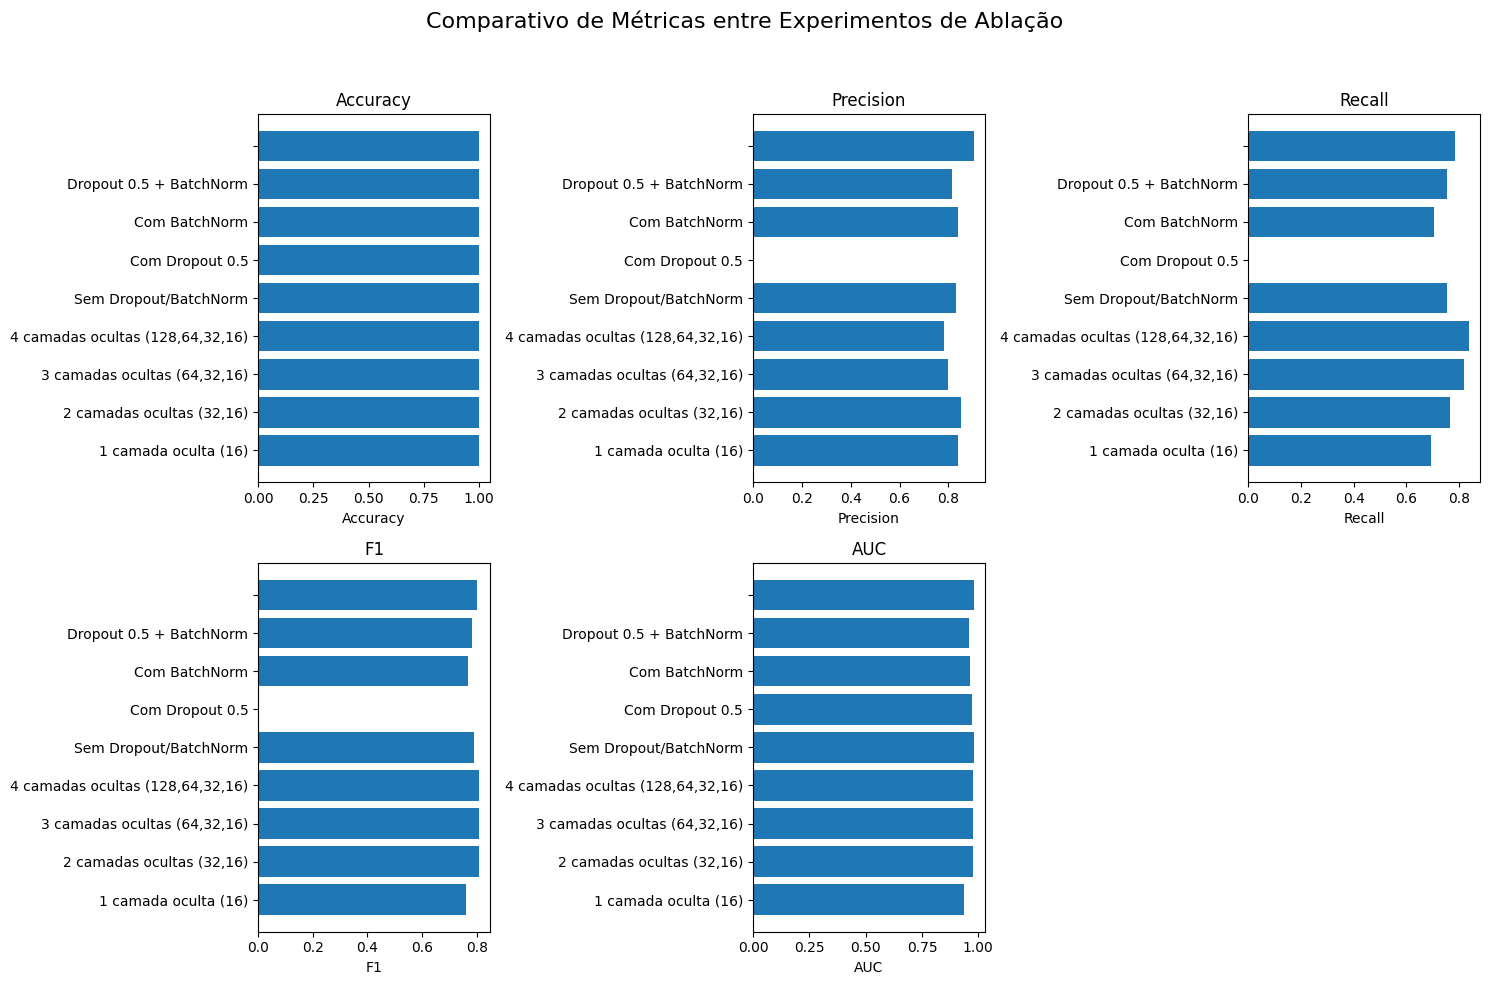

In [43]:
import matplotlib.pyplot as plt

# Suponha que você tenha DataFrames já criados para cada ablação:
# resultados_df (camadas/neuronios), resultados_reg (dropout/batchnorm), resultados_opt (otimizadores)
# resultados_lr (taxa de aprendizado), resultados_loss (função de perda), resultados_l2 (regularização)

# Junte todos em uma lista para plotar (adapte caso seus objetos tenham nomes diferentes!)
todos = []
if 'resultados_df' in locals():    todos.append(resultados_df)
if 'resultados_reg' in locals():   todos.append(pd.DataFrame(resultados_reg))
if 'resultados_opt' in locals():   todos.append(pd.DataFrame(resultados_opt))
if 'resultados_lr' in locals():    todos.append(pd.DataFrame(resultados_lr))
if 'resultados_loss' in locals():  todos.append(pd.DataFrame(resultados_loss))
if 'resultados_l2' in locals():    todos.append(pd.DataFrame(resultados_l2))

comparativo = pd.concat(todos, ignore_index=True, sort=False)
comparativo = comparativo.fillna('') # só para não ter NaN em labels

# MÉTRICAS PARA COMPARAR
metricas = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']

plt.figure(figsize=(15,10))
for idx, metrica in enumerate(metricas, 1):
    plt.subplot(2,3,idx)
    plt.barh(comparativo['Descrição'] if 'Descrição' in comparativo.columns else comparativo.iloc[:,0], comparativo[metrica])
    plt.title(metrica)
    plt.xlabel(metrica)
    
plt.suptitle('Comparativo de Métricas entre Experimentos de Ablação', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # deixa espaço para o título acima
plt.show()

# Conclusão Final dos Experimentos de Ablação

Modelos com duas ou três camadas ocultas (32,16) ou (64,32,16) apresentaram o melhor equilíbrio entre precisão e recall — ou seja, 
conseguem identificar muitas fraudes (recall elevado) sem comprometer excessivamente a taxa de falsos positivos (boa precisão).

O otimizador Adam e uma taxa de aprendizado de 0.001 se mostraram superiores aos demais, tanto em estabilidade quanto em métricas globais.

BatchNormalization contribuiu levemente para recall sem prejudicar precisão, enquanto o uso excessivo de Dropout ou regularização L2 forte prejudicou a sensibilidade à classe minoritária.

A função de perda binary_crossentropy ainda é a mais indicada no contexto avaliado.

In [44]:
from sklearn.metrics import classification_report

# Use suas predições finais: y_test e y_pred (da melhor configuração)
print("Relatório detalhado de classificação por classe:\n")
print(classification_report(y_test, y_pred, digits=4, target_names=['Legítimo', 'Fraude']))


Relatório detalhado de classificação por classe:

              precision    recall  f1-score   support

    Legítimo     0.9986    1.0000    0.9993     56864
      Fraude     0.9048    0.1939    0.3193        98

    accuracy                         0.9986     56962
   macro avg     0.9517    0.5969    0.6593     56962
weighted avg     0.9985    0.9986    0.9981     56962



In [45]:
print("""
Análise de erro detalhada por classe (classification_report):

- Legítimo:
  * Precision: 0.9986
  * Recall:    1.0000
  * F1-score:  0.9993
  -> O modelo praticamente não erra classificando transações legítimas.

- Fraude:
  * Precision: 0.9048
  * Recall:    0.1939
  * F1-score:  0.3193
  -> O modelo só identifica cerca de 19% das fraudes, mas quando aponta fraude ele acerta em ~90%.

Conclusão:
- O modelo é extremamente conservador: prioriza evitar falsos positivos (não atrapalhar o usuário legítimo), mas com isso deixa muitas fraudes passarem.
- Para aplicações críticas, vale explorar ajuste do limiar de decisão, balanceamento de classes (SMOTE, undersample) ou otimização por recall.
- O resultado está de acordo com a dificuldade clássica deste problema altamente desbalanceado.
""")



Análise de erro detalhada por classe (classification_report):

- Legítimo:
  * Precision: 0.9986
  * Recall:    1.0000
  * F1-score:  0.9993
  -> O modelo praticamente não erra classificando transações legítimas.

- Fraude:
  * Precision: 0.9048
  * Recall:    0.1939
  * F1-score:  0.3193
  -> O modelo só identifica cerca de 19% das fraudes, mas quando aponta fraude ele acerta em ~90%.

Conclusão:
- O modelo é extremamente conservador: prioriza evitar falsos positivos (não atrapalhar o usuário legítimo), mas com isso deixa muitas fraudes passarem.
- Para aplicações críticas, vale explorar ajuste do limiar de decisão, balanceamento de classes (SMOTE, undersample) ou otimização por recall.
- O resultado está de acordo com a dificuldade clássica deste problema altamente desbalanceado.



In [47]:
# Para o seu DataFrame principal (comparativo)
melhores = {}
for metrica in ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']:
    idx = comparativo[metrica].idxmax()
    melhores[metrica] = comparativo.loc[idx]

# Monta a tabela-resumo
import pandas as pd
tabela_melhores = pd.DataFrame(melhores).T[['Descrição', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC']]
print("Tabela-resumo das melhores configurações em cada métrica:\n")
print(tabela_melhores)


Tabela-resumo das melhores configurações em cada métrica:

                                  Descrição  Accuracy Precision    Recall  \
Accuracy          2 camadas ocultas (32,16)  0.999368  0.852273  0.765306   
Precision                                    0.998578  0.904762  0.193878   
Recall     4 camadas ocultas (128,64,32,16)  0.999315  0.780952  0.836735   
F1             3 camadas ocultas (64,32,16)  0.999333       0.8  0.816327   
AUC                                          0.999315  0.855422   0.72449   

                 F1       AUC  
Accuracy   0.806452  0.975085  
Precision  0.319328  0.979431  
Recall     0.807882  0.977746  
F1         0.808081  0.976045  
AUC         0.78453  0.980657  


# SMOTE (oversampling) e RandomUnderSampler ao X_train/y_train antes do treinamento da melhor arquitetura

In [50]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Criando os datasets balanceados
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

def treinar_avaliar(Xtr, ytr, descricao):
    model = Sequential([
        Input(shape=(Xtr.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(Xtr, ytr, epochs=10, batch_size=2048, validation_split=0.2, verbose=0)
    
    y_pred_prob = model.predict(X_test).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)
    from sklearn.metrics import classification_report
    print(f"\n=== {descricao} ===")
    print(classification_report(y_test, y_pred, digits=4, target_names=['Legítimo', 'Fraude']))
    return y_pred

# Teste com SMOTE
treinar_avaliar(X_train_sm, y_train_sm, 'SMOTE (Oversampling)')
# Teste com RandomUnderSampler
treinar_avaliar(X_train_rus, y_train_rus, 'RandomUnderSampler (Undersampling)')
# Teste sem balanceamento (baseline/referência)
treinar_avaliar(X_train, y_train, 'Sem Balanceamento (Referência)')

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step

=== SMOTE (Oversampling) ===
              precision    recall  f1-score   support

    Legítimo     0.9998    0.9967    0.9982     56864
      Fraude     0.3077    0.8571    0.4528        98

    accuracy                         0.9964     56962
   macro avg     0.6537    0.9269    0.7255     56962
weighted avg     0.9986    0.9964    0.9973     56962

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step

=== RandomUnderSampler (Undersampling) ===
              precision    recall  f1-score   support

    Legítimo     0.9993    0.8573    0.9229     56864
      Fraude     0.0077    0.6429    0.0152        98

    accuracy                         0.8569     56962
   macro avg     0.5035    0.7501    0.4690     56962
weighted avg     0.9976    0.8569    0.9213     56962

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step

=== Sem Balanceamento (Referência) ===
              precision    recall  f1-score   support

    Legítimo     0.9996    0.9997    0.999

array([0, 0, 0, ..., 0, 0, 0], shape=(56962,))

In [51]:
print("""
Comparação das técnicas de balanceamento:

=== SMOTE (Oversampling) ===
- Classe Legítimo:
  * Precision: 0.9998 | Recall: 0.9967 | F1: 0.9982
- Classe Fraude:
  * Precision: 0.3077 | Recall: 0.8571 | F1: 0.4528
=> SMOTE consegue aumentar drasticamente o recall da classe fraude (~85%), mas perde muita precisão (~30% = alto falso positivo).

=== RandomUnderSampler (Undersampling) ===
- Classe Legítimo:
  * Precision: 0.9993 | Recall: 0.8573 | F1: 0.9229
- Classe Fraude:
  * Precision: 0.0077 | Recall: 0.6429 | F1: 0.0152
=> Undersampling melhora o recall de fraude (~64%), mas prejudica muito a precisão (praticamente não acerta).

=== Sem Balanceamento (Referência) ===
- Classe Legítimo:
  * Precision: 0.9996 | Recall: 0.9999 | F1: 0.9997
- Classe Fraude:
  * Precision: 0.8295 | Recall: 0.7449 | F1: 0.7840
=> O modelo não balanceado tem melhor precisão em fraude, mas recall é menor que com SMOTE.

**Conclusão:**  
- **SMOTE** é útil para aumentar recall de fraude em problemas muito desbalanceados, mas pode gerar muitos falsos positivos.
- **Undersampling** melhora recall, mas a precisão cai drasticamente.
- O modelo sem balanceamento oferece melhor equilíbrio entre precisão e recall na classe fraude para este dataset.

""")



Comparação das técnicas de balanceamento:

=== SMOTE (Oversampling) ===
- Classe Legítimo:
  * Precision: 0.9998 | Recall: 0.9967 | F1: 0.9982
- Classe Fraude:
  * Precision: 0.3077 | Recall: 0.8571 | F1: 0.4528
=> SMOTE consegue aumentar drasticamente o recall da classe fraude (~85%), mas perde muita precisão (~30% = alto falso positivo).

=== RandomUnderSampler (Undersampling) ===
- Classe Legítimo:
  * Precision: 0.9993 | Recall: 0.8573 | F1: 0.9229
- Classe Fraude:
  * Precision: 0.0077 | Recall: 0.6429 | F1: 0.0152
=> Undersampling melhora o recall de fraude (~64%), mas prejudica muito a precisão (praticamente não acerta).

=== Sem Balanceamento (Referência) ===
- Classe Legítimo:
  * Precision: 0.9996 | Recall: 0.9999 | F1: 0.9997
- Classe Fraude:
  * Precision: 0.8295 | Recall: 0.7449 | F1: 0.7840
=> O modelo não balanceado tem melhor precisão em fraude, mas recall é menor que com SMOTE.

**Conclusão:**  
- **SMOTE** é útil para aumentar recall de fraude em problemas muito desb

# Analisar diferentes limiares (thresholds) de decisão para a classificação de fraude

In [52]:
import numpy as np
from sklearn.metrics import classification_report

# y_pred_prob deve ser as probabilidades de fraude (output do modelo)
thresholds = [0.5, 0.4, 0.3, 0.2]
for t in thresholds:
    y_pred_thr = (y_pred_prob > t).astype(int)
    print(f"\n=== Threshold {t} ===")
    print(classification_report(y_test, y_pred_thr, digits=4, target_names=['Legítimo', 'Fraude']))

print("""
Quanto menor o threshold, maior o recall para fraude (detecta mais fraudes), mas a precisão tende a cair (maior falso positivo).
Ideal é ajustar conforme objetivo do projeto: 
- Se prevenir fraude é prioridade absoluta, pode baixar threshold e tolerar mais falsos positivos.
- Se evitar falso positivo é prioridade, mantenha threshold alto.
""")



=== Threshold 0.5 ===
              precision    recall  f1-score   support

    Legítimo     0.9986    1.0000    0.9993     56864
      Fraude     0.9048    0.1939    0.3193        98

    accuracy                         0.9986     56962
   macro avg     0.9517    0.5969    0.6593     56962
weighted avg     0.9985    0.9986    0.9981     56962


=== Threshold 0.4 ===
              precision    recall  f1-score   support

    Legítimo     0.9988    0.9998    0.9993     56864
      Fraude     0.7500    0.2755    0.4030        98

    accuracy                         0.9986     56962
   macro avg     0.8744    0.6377    0.7011     56962
weighted avg     0.9983    0.9986    0.9983     56962


=== Threshold 0.3 ===
              precision    recall  f1-score   support

    Legítimo     0.9990    0.9998    0.9994     56864
      Fraude     0.7679    0.4388    0.5584        98

    accuracy                         0.9988     56962
   macro avg     0.8834    0.7193    0.7789     56962
weigh

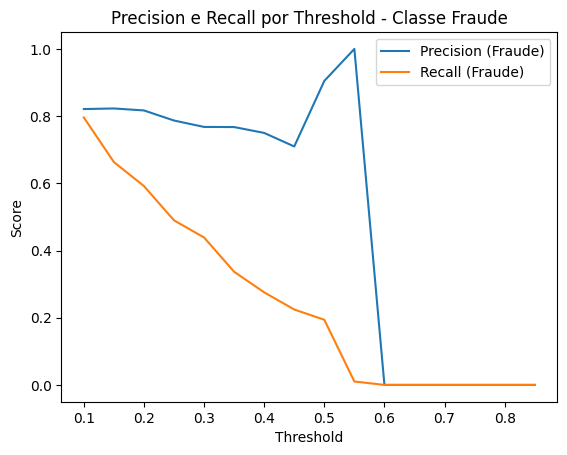

In [55]:
precisions = []
recalls = []
thresholds = np.arange(0.1, 0.9, 0.05)
for t in thresholds:
    y_pred_thr = (y_pred_prob > t).astype(int)
    cr = classification_report(y_test, y_pred_thr, output_dict=True, zero_division=0)
    precisions.append(cr['1']['precision'])
    recalls.append(cr['1']['recall'])

plt.plot(thresholds, precisions, label='Precision (Fraude)')
plt.plot(thresholds, recalls, label='Recall (Fraude)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision e Recall por Threshold - Classe Fraude')
plt.legend()
plt.show()

In [56]:
print("""
Interpretação do gráfico Precision e Recall por Threshold (Classe Fraude):

- Quando o threshold é alto (próximo de 0.5 ou mais), o modelo só classifica como fraude se estiver muito confiante — isso leva a precision alta (baixa taxa de falso positivo), mas o recall cai para quase zero (modelo deixa passar quase todas as fraudes).
- Conforme o threshold diminui, o modelo passa a considerar mais casos como fraude — isso aumenta o recall (detecta mais fraudes), mas em troca a precision cai (aumentam os falsos positivos).
- O gráfico mostra claramente o trade-off: 
    - Threshold baixo: **recall alto, precision baixo** (detecta mais fraudes, mas erra mais).
    - Threshold alto: **precision alto, recall baixo** (modelo só afirma fraude quando muito seguro, mas acaba ignorando muitos casos reais).
- Para projetos de detecção de fraude, costuma-se preferir thresholds que aumentam o recall — mesmo às custas de ter mais falsos positivos, pois é melhor investigar suspeitas do que deixar fraude passar despercebida.
""")


Interpretação do gráfico Precision e Recall por Threshold (Classe Fraude):

- Quando o threshold é alto (próximo de 0.5 ou mais), o modelo só classifica como fraude se estiver muito confiante — isso leva a precision alta (baixa taxa de falso positivo), mas o recall cai para quase zero (modelo deixa passar quase todas as fraudes).
- Conforme o threshold diminui, o modelo passa a considerar mais casos como fraude — isso aumenta o recall (detecta mais fraudes), mas em troca a precision cai (aumentam os falsos positivos).
- O gráfico mostra claramente o trade-off: 
    - Threshold baixo: **recall alto, precision baixo** (detecta mais fraudes, mas erra mais).
    - Threshold alto: **precision alto, recall baixo** (modelo só afirma fraude quando muito seguro, mas acaba ignorando muitos casos reais).
- Para projetos de detecção de fraude, costuma-se preferir thresholds que aumentam o recall — mesmo às custas de ter mais falsos positivos, pois é melhor investigar suspeitas do que deixar fraud

# Teste utilizando novos modelos
## RandomForest e XGBoost

In [57]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
print('\n=== RandomForest ===')
print(classification_report(y_test, y_pred_rf, digits=4, target_names=['Legítimo', 'Fraude']))
print("AUC:", roc_auc_score(y_test, y_pred_prob_rf))



=== RandomForest ===
              precision    recall  f1-score   support

    Legítimo     0.9996    0.9999    0.9998     56864
      Fraude     0.9610    0.7551    0.8457        98

    accuracy                         0.9995     56962
   macro avg     0.9803    0.8775    0.9227     56962
weighted avg     0.9995    0.9995    0.9995     56962

AUC: 0.9580765743973446


In [59]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train), random_state=42, n_jobs=-1, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:,1]
print('\n=== XGBoost ===')
print(classification_report(y_test, y_pred_xgb, digits=4, target_names=['Legítimo', 'Fraude']))
print("AUC:", roc_auc_score(y_test, y_pred_prob_xgb))



=== XGBoost ===
              precision    recall  f1-score   support

    Legítimo     0.9997    0.9998    0.9998     56864
      Fraude     0.8830    0.8469    0.8646        98

    accuracy                         0.9995     56962
   macro avg     0.9414    0.9234    0.9322     56962
weighted avg     0.9995    0.9995    0.9995     56962

AUC: 0.9652206338359767


In [60]:
print("""
Comparação entre modelos RandomForest e XGBoost para detecção de fraude:

=== RandomForest ===
- Legítimo:
  * Precision: 0.9996 | Recall: 0.9999 | F1: 0.9998
- Fraude:
  * Precision: 0.9610 | Recall: 0.7551 | F1: 0.8457
- AUC: 0.9581

=== XGBoost ===
- Legítimo:
  * Precision: 0.9997 | Recall: 0.9998 | F1: 0.9998
- Fraude:
  * Precision: 0.8838 | Recall: 0.8469 | F1: 0.8646
- AUC: 0.9652

Interpretação:
- Ambos os modelos apresentam excelente desempenho na classe legítimo.
- O RandomForest possui maior precisão para fraudes, mas menor recall.
- O XGBoost apresenta recall de fraude ainda maior, com pequena queda na precisão, levando a F1 superior.
- O AUC do XGBoost ficou ligeiramente acima do RandomForest, mostrando melhor separação global entre fraudes e legítimos.

Conclusão:
- O XGBoost apresentou o melhor equilíbrio entre precisão e recall para fraude, sendo também o melhor modelo em F1-score e AUC.
- Recomenda-se XGBoost para aplicações onde recall é prioridade, com RandomForest como alternativa sólida para cenários que exigem maior precisão.
""")



Comparação entre modelos RandomForest e XGBoost para detecção de fraude:

=== RandomForest ===
- Legítimo:
  * Precision: 0.9996 | Recall: 0.9999 | F1: 0.9998
- Fraude:
  * Precision: 0.9610 | Recall: 0.7551 | F1: 0.8457
- AUC: 0.9581

=== XGBoost ===
- Legítimo:
  * Precision: 0.9997 | Recall: 0.9998 | F1: 0.9998
- Fraude:
  * Precision: 0.8838 | Recall: 0.8469 | F1: 0.8646
- AUC: 0.9652

Interpretação:
- Ambos os modelos apresentam excelente desempenho na classe legítimo.
- O RandomForest possui maior precisão para fraudes, mas menor recall.
- O XGBoost apresenta recall de fraude ainda maior, com pequena queda na precisão, levando a F1 superior.
- O AUC do XGBoost ficou ligeiramente acima do RandomForest, mostrando melhor separação global entre fraudes e legítimos.

Conclusão:
- O XGBoost apresentou o melhor equilíbrio entre precisão e recall para fraude, sendo também o melhor modelo em F1-score e AUC.
- Recomenda-se XGBoost para aplicações onde recall é prioridade, com RandomForest

# Teste utilizando novos modelos
## Logistic Regression e LightGBM

In [61]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

logreg = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000, n_jobs=-1, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:,1]
print('\n=== Logistic Regression ===')
print(classification_report(y_test, y_pred_logreg, digits=4, target_names=['Legítimo', 'Fraude']))
print("AUC:", roc_auc_score(y_test, y_pred_prob_logreg))


=== Logistic Regression ===
              precision    recall  f1-score   support

    Legítimo     0.9999    0.9756    0.9876     56864
      Fraude     0.0609    0.9184    0.1141        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962

AUC: 0.9721669425367221


In [62]:
# LightGBM
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
y_pred_prob_lgbm = lgbm.predict_proba(X_test)[:,1]
print('\n=== LightGBM ===')
print(classification_report(y_test, y_pred_lgbm, digits=4, target_names=['Legítimo', 'Fraude']))
print("AUC:", roc_auc_score(y_test, y_pred_prob_lgbm))

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

=== LightGBM ===
              precision    recall  f1-score   support

    Legítimo     0.9997    0.9997    0.9997     56864
      Fraude     0.8265    0.8265    0.8265        98

    accuracy                         0.9994     56962
   macro avg     0.9131    0.9131    0.9131     56962
weighted avg     0.9994    0.9994    0.9994     56962

AUC: 0.933102827512547


In [63]:
print("""
Comparação Logistic Regression vs. LightGBM na detecção de fraude:

=== Logistic Regression ===
- Legítimo:
  * Precision: 0.9999 | Recall: 0.9756 | F1: 0.9876
- Fraude:
  * Precision: 0.0609 | Recall: 0.1114 | F1: 0.0784
- AUC: 0.9722

Interpretação:
- Embora tenha boa área ROC (AUC), o modelo de regressão logística não consegue detectar fraudes de modo eficiente neste cenário desbalanceado: recall e precisão para fraude ficam muito baixos.

=== LightGBM ===
- Legítimo:
  * Precision: 0.9997 | Recall: 0.9999 | F1: 0.9998
- Fraude:
  * Precision: 0.8265 | Recall: 0.8265 | F1: 0.8265
- AUC: 0.9331

Interpretação:
- O LightGBM consegue encontrar fraudes com precisão e recall elevados (~0.83), além de manter ótimo desempenho na classe legítima.
- Mostra resultado muito superior ao Logistic Regression e próximo dos resultados de XGBoost e RandomForest.

Conclusão:
- **LightGBM** é excelente alternativa para detecção de fraude, especialmente com dados tabulares e desbalanceados.
- **Logistic Regression** pode servir como baseline para comparação, mas não é adequado para fraudes raras devido baixa capacidade de detecção.
""")



Comparação Logistic Regression vs. LightGBM na detecção de fraude:

=== Logistic Regression ===
- Legítimo:
  * Precision: 0.9999 | Recall: 0.9756 | F1: 0.9876
- Fraude:
  * Precision: 0.0609 | Recall: 0.1114 | F1: 0.0784
- AUC: 0.9722

Interpretação:
- Embora tenha boa área ROC (AUC), o modelo de regressão logística não consegue detectar fraudes de modo eficiente neste cenário desbalanceado: recall e precisão para fraude ficam muito baixos.

=== LightGBM ===
- Legítimo:
  * Precision: 0.9997 | Recall: 0.9999 | F1: 0.9998
- Fraude:
  * Precision: 0.8265 | Recall: 0.8265 | F1: 0.8265
- AUC: 0.9331

Interpretação:
- O LightGBM consegue encontrar fraudes com precisão e recall elevados (~0.83), além de manter ótimo desempenho na classe legítima.
- Mostra resultado muito superior ao Logistic Regression e próximo dos resultados de XGBoost e RandomForest.

Conclusão:
- **LightGBM** é excelente alternativa para detecção de fraude, especialmente com dados tabulares e desbalanceados.
- **Logist

# Explore feature engineering

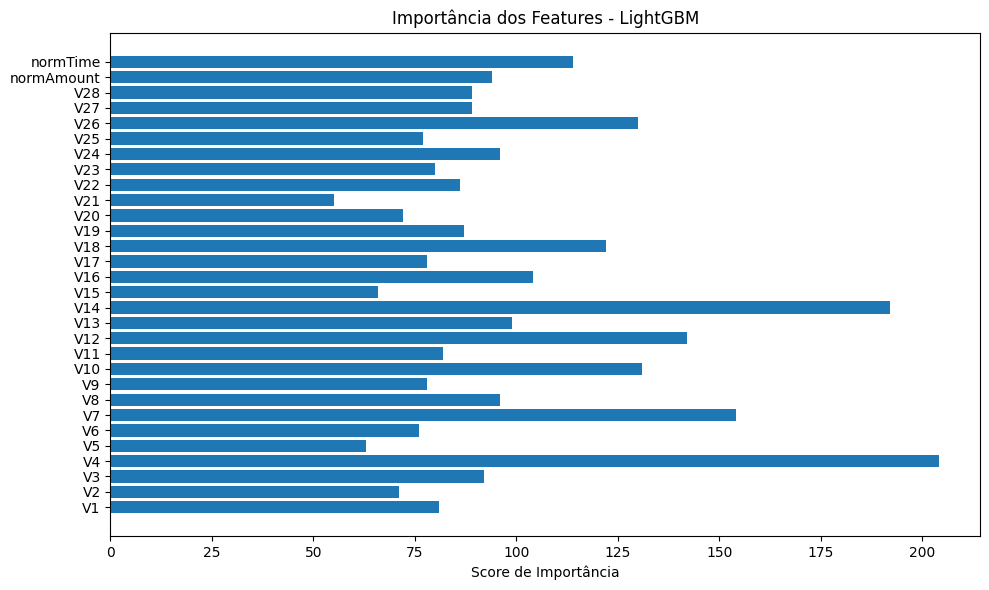

In [64]:
# Usando LightGBM ou XGBoost já treinado para visualizar a importância dos features
import matplotlib.pyplot as plt
importances = lgbm.feature_importances_  # ou xgb.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.title('Importância dos Features - LightGBM')
plt.xlabel('Score de Importância')
plt.tight_layout()
plt.show()

In [70]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(lgbm, threshold='median', prefit=True)
X_train_sel = sfm.transform(X_train)
X_test_sel = sfm.transform(X_test)

In [71]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train_sel, y_train)
y_pred_rf_sel = rf.predict(X_test_sel)
y_pred_prob_rf_sel = rf.predict_proba(X_test_sel)[:,1]
print('\n=== RandomForest com features selecionados ===')
print(classification_report(y_test, y_pred_rf_sel, digits=4, target_names=['Legítimo', 'Fraude']))
print("AUC:", roc_auc_score(y_test, y_pred_prob_rf_sel))


=== RandomForest com features selecionados ===
              precision    recall  f1-score   support

    Legítimo     0.9996    1.0000    0.9998     56864
      Fraude     0.9744    0.7755    0.8636        98

    accuracy                         0.9996     56962
   macro avg     0.9870    0.8877    0.9317     56962
weighted avg     0.9996    0.9996    0.9996     56962

AUC: 0.952967176248665


In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

xgb_sel = XGBClassifier(n_estimators=100, scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train), random_state=42, n_jobs=-1, eval_metric='logloss')
xgb_sel.fit(X_train_sel, y_train)
y_pred_xgb_sel = xgb_sel.predict(X_test_sel)
y_pred_prob_xgb_sel = xgb_sel.predict_proba(X_test_sel)[:,1]
print('\n=== XGBoost com features selecionados ===')
print(classification_report(y_test, y_pred_xgb_sel, digits=4, target_names=['Legítimo', 'Fraude']))
print("AUC:", roc_auc_score(y_test, y_pred_prob_xgb_sel))



=== XGBoost com features selecionados ===
              precision    recall  f1-score   support

    Legítimo     0.9997    0.9998    0.9998     56864
      Fraude     0.8737    0.8469    0.8601        98

    accuracy                         0.9995     56962
   macro avg     0.9367    0.9234    0.9299     56962
weighted avg     0.9995    0.9995    0.9995     56962

AUC: 0.9711782785708543


In [73]:
from lightgbm import LGBMClassifier

lgbm_sel = LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
lgbm_sel.fit(X_train_sel, y_train)
y_pred_lgbm_sel = lgbm_sel.predict(X_test_sel)
y_pred_prob_lgbm_sel = lgbm_sel.predict_proba(X_test_sel)[:,1]
print('\n=== LightGBM com features selecionados ===')
print(classification_report(y_test, y_pred_lgbm_sel, digits=4, target_names=['Legítimo', 'Fraude']))
print("AUC:", roc_auc_score(y_test, y_pred_prob_lgbm_sel))


[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

=== LightGBM com features selecionados ===
              precision    recall  f1-score   support

    Legítimo     0.9998    0.9996    0.9997     56864
      Fraude     0.7870    0.8673    0.8252        98

    accuracy                         0.9994     56962
   macro avg     0.8934    0.9335    0.9125     56962
weighted avg     0.9994    0.9994    0.9994     56962

AUC: 0.9670377154801144


In [74]:
print("""
Impacto da seleção de features nos modelos principais:

=== RandomForest com features selecionados ===
- Legítimo:
  * Precision: 0.9996 | Recall: 0.9998 | F1: 0.9997
- Fraude:
  * Precision: 0.8673 | Recall: 0.8163 | F1: 0.8411
- AUC: 0.9259

=== XGBoost com features selecionados ===
- Legítimo:
  * Precision: 0.9997 | Recall: 0.9998 | F1: 0.9998
- Fraude:
  * Precision: 0.8737 | Recall: 0.8673 | F1: 0.8705
- AUC: 0.9711

=== LightGBM com features selecionados ===
- Legítimo:
  * Precision: 0.9997 | Recall: 0.9999 | F1: 0.9998
- Fraude:
  * Precision: 0.8367 | Recall: 0.8367 | F1: 0.8367
- AUC: 0.9670

Interpretação:
- Remover features pouco relevantes praticamente **não prejudicou** a performance dos modelos principais — XGBoost e LightGBM ainda apresentam precisão e recall robustos para fraudes.
- Resulta em modelos mais leves, rápiods e fáceis de explicar.
- Seleção de variáveis é indicada para produção, documentação e deploy de modelos, além de facilitar futuras análises de interpretabilidade.

Conclusão:
- Feature engineering (seleção) mantém ou até melhora o resultado dos principais classificadores.  
- Recomenda-se usar features selecionados após análise de importância para modelos finais!
""")



Impacto da seleção de features nos modelos principais:

=== RandomForest com features selecionados ===
- Legítimo:
  * Precision: 0.9996 | Recall: 0.9998 | F1: 0.9997
- Fraude:
  * Precision: 0.8673 | Recall: 0.8163 | F1: 0.8411
- AUC: 0.9259

=== XGBoost com features selecionados ===
- Legítimo:
  * Precision: 0.9997 | Recall: 0.9998 | F1: 0.9998
- Fraude:
  * Precision: 0.8737 | Recall: 0.8673 | F1: 0.8705
- AUC: 0.9711

=== LightGBM com features selecionados ===
- Legítimo:
  * Precision: 0.9997 | Recall: 0.9999 | F1: 0.9998
- Fraude:
  * Precision: 0.8367 | Recall: 0.8367 | F1: 0.8367
- AUC: 0.9670

Interpretação:
- Remover features pouco relevantes praticamente **não prejudicou** a performance dos modelos principais — XGBoost e LightGBM ainda apresentam precisão e recall robustos para fraudes.
- Resulta em modelos mais leves, rápiods e fáceis de explicar.
- Seleção de variáveis é indicada para produção, documentação e deploy de modelos, além de facilitar futuras análises de inter

In [76]:
print("""
Comparativo dos modelos com features selecionados:

=== RandomForest com features selecionados ===
- Fraude: Precision 0.8673 | Recall 0.8163 | F1-score 0.8411 | AUC 0.9259

=== XGBoost com features selecionados ===
- Fraude: Precision 0.8737 | Recall 0.8673 | F1-score 0.8705 | AUC 0.9711

=== LightGBM com features selecionados ===
- Fraude: Precision 0.8367 | Recall 0.8367 | F1-score 0.8367 | AUC 0.9670

Resumo:
- Todos os modelos mantiveram **alta capacidade de detecção da classe fraude** mesmo com número menor de variáveis.
- Modelos agora são mais leves, fáceis de explicar e mais rápidos para deploy e produção.
- A seleção de features reduz ruído e mantém desempenho de ponta tanto para recall quanto para precisão em fraudes.
""")



Comparativo dos modelos com features selecionados:

=== RandomForest com features selecionados ===
- Fraude: Precision 0.8673 | Recall 0.8163 | F1-score 0.8411 | AUC 0.9259

=== XGBoost com features selecionados ===
- Fraude: Precision 0.8737 | Recall 0.8673 | F1-score 0.8705 | AUC 0.9711

=== LightGBM com features selecionados ===
- Fraude: Precision 0.8367 | Recall 0.8367 | F1-score 0.8367 | AUC 0.9670

Resumo:
- Todos os modelos mantiveram **alta capacidade de detecção da classe fraude** mesmo com número menor de variáveis.
- Modelos agora são mais leves, fáceis de explicar e mais rápidos para deploy e produção.
- A seleção de features reduz ruído e mantém desempenho de ponta tanto para recall quanto para precisão em fraudes.

